In [1]:
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas numpy matplotlib seaborn scipy scikit-learn



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Converting the text file to data frame

In [4]:
df = pd.read_csv("household_power_consumption.txt", sep=";")

df.to_csv("household_power_consumption1.csv", index=False)

df.describe()
df.head()


C:\Users\judej\AppData\Local\Temp\ipykernel_11512\426080442.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("household_power_consumption.txt", sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df['Sub_metering_1']
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
df.shape

(2075259, 9)

In [7]:
df["Sub_metering_3"].isnull().sum()

np.int64(25979)

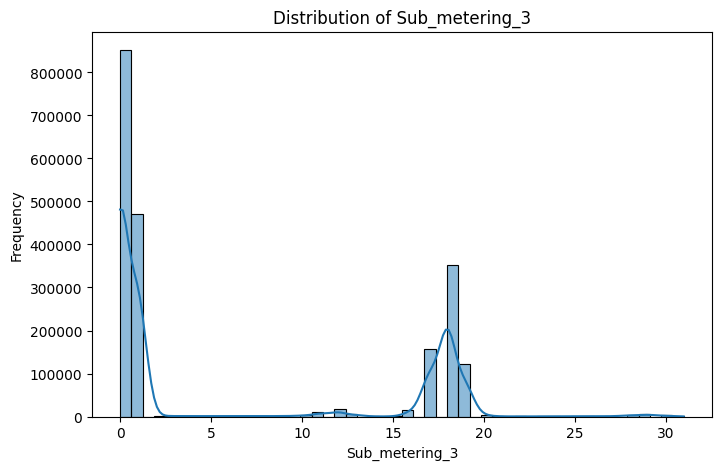

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["Sub_metering_3"].dropna(), bins=50, kde=True)
plt.title("Distribution of Sub_metering_3")
plt.xlabel("Sub_metering_3")
plt.ylabel("Frequency")
plt.show()

Filling Null Values

In [9]:
df["Sub_metering_3"] = df["Sub_metering_3"].fillna(df["Sub_metering_3"].mean())


In [10]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB



In this step the Date and Time columns are converted into proper datetime formats.  
And all the other power and sub-metering columns are converted to numeric types

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time


df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')


In [13]:
df.duplicated().sum()

np.int64(0)

Removing Extreme outliers

In [14]:

features = ['Global_reactive_power', 'Voltage', 'Global_intensity',  'Sub_metering_2', 'Sub_metering_3']


for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


target = 'Global_active_power'


### Box Plot to determine the outliers


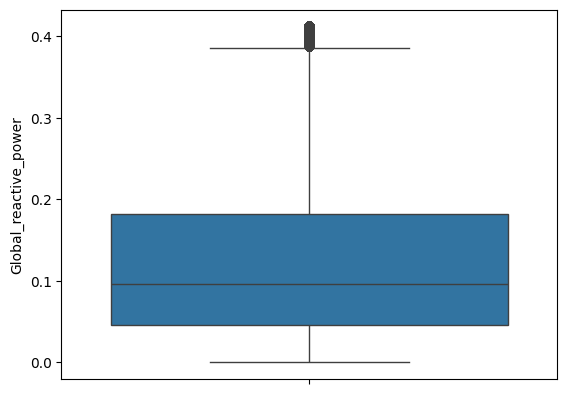

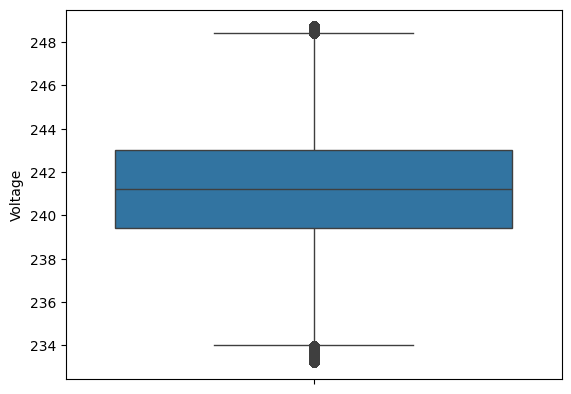

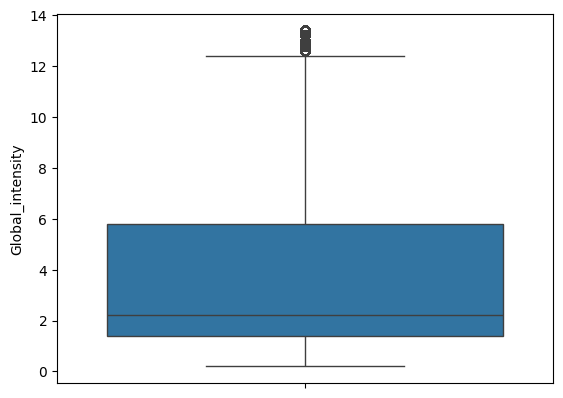

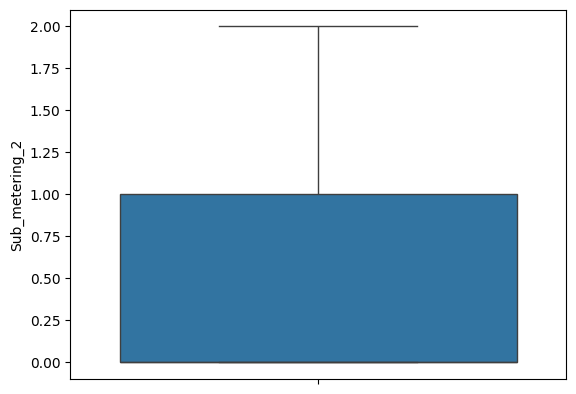

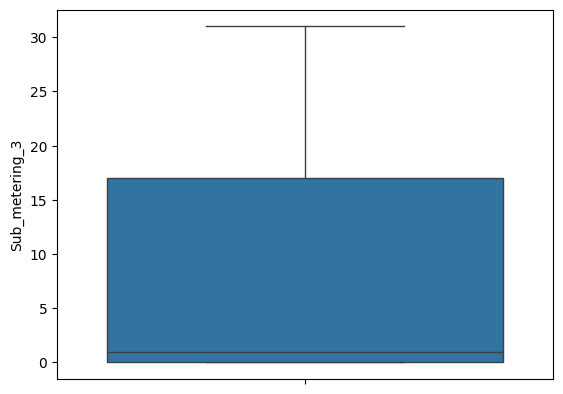

In [15]:
for i in features:
    sns.boxplot(df[i]) 
    plt.show()


### Reducing the outliers


In [16]:

df['Global_reactive_power'] = np.log1p(df['Global_reactive_power'])
df['Global_intensity'] = np.log1p(df['Global_intensity'])
df['Sub_metering_3'] = np.sqrt(df['Sub_metering_3'])


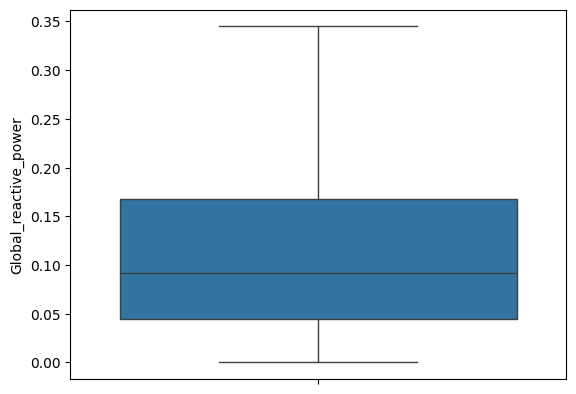

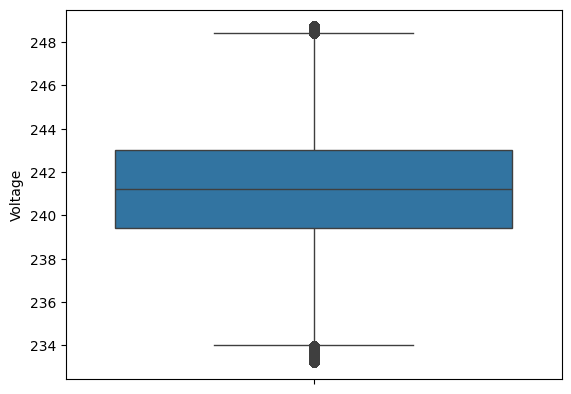

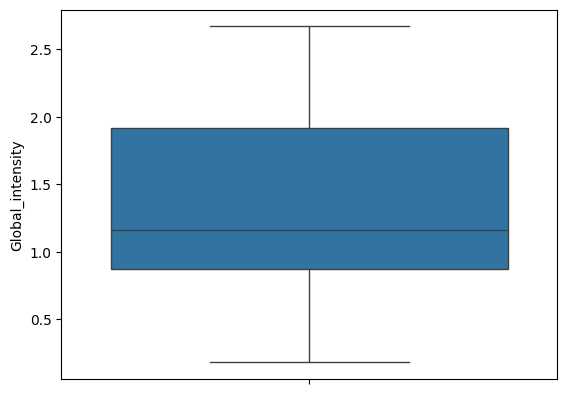

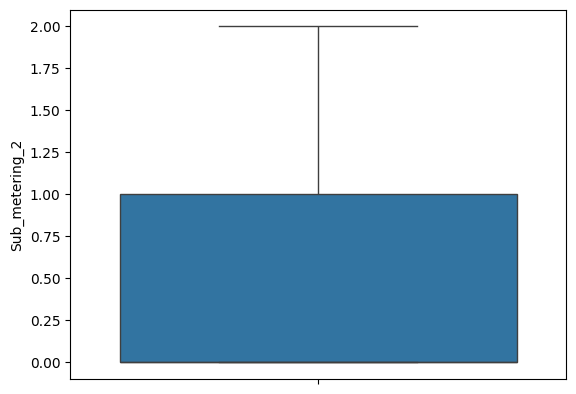

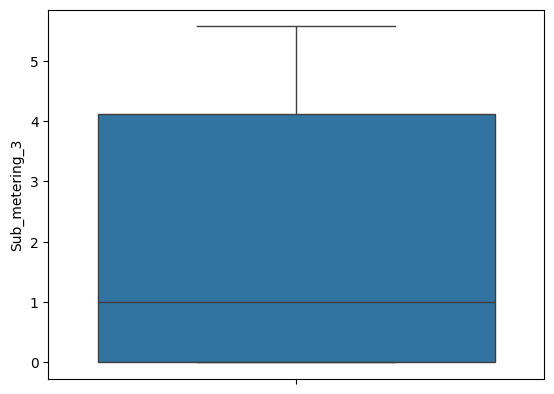

In [17]:
for i in features:
    sns.boxplot(df[i]) 
    plt.show()


In [18]:

for col in features:
    if skew(df[col]) > 1:  
        df[col] = np.log1p(df[col])  
    elif skew(df[col]) < -1:  
        df[col] = np.sqrt(df[col])  

skewness_values = {col: skew(df[col].dropna()) for col in features}
for col, skew_val in skewness_values.items():
    print(f"Skewness of {col}: {skew_val:.4f}")


Skewness of Global_reactive_power: 0.5588
Skewness of Voltage: -0.1242
Skewness of Global_intensity: 0.2975
Skewness of Sub_metering_2: 1.3016
Skewness of Sub_metering_3: 0.6718


In [19]:
skewness_values = {col: skew(df[col].dropna()) for col in features}


for col, skew_val in skewness_values.items():
    print(f'Skewness of {col}: {skew_val:.4f}')

Skewness of Global_reactive_power: 0.5588
Skewness of Voltage: -0.1242
Skewness of Global_intensity: 0.2975
Skewness of Sub_metering_2: 1.3016
Skewness of Sub_metering_3: 0.6718


In [20]:

updated_skewness = skew(df["Sub_metering_2"].dropna())

print(f'Updated Skewness of Sub_metering_2: {updated_skewness:.4f}')

Updated Skewness of Sub_metering_2: 1.3016


In [21]:
df["Sub_metering_2"], _ = boxcox(df["Sub_metering_2"] + 1)  
updated_skewness = skew(df["Sub_metering_2"].dropna())
print(f'Updated Skewness of Sub_metering_2 (Box-Cox): {updated_skewness:.4f}')

Updated Skewness of Sub_metering_2 (Box-Cox): 1.0595


In [22]:
df["Sub_metering_2"] = np.log1p(df["Sub_metering_2"]) 
print(f"Skewness after log1p: {skew(df['Sub_metering_2']):.4f}")

Skewness after log1p: 1.0592


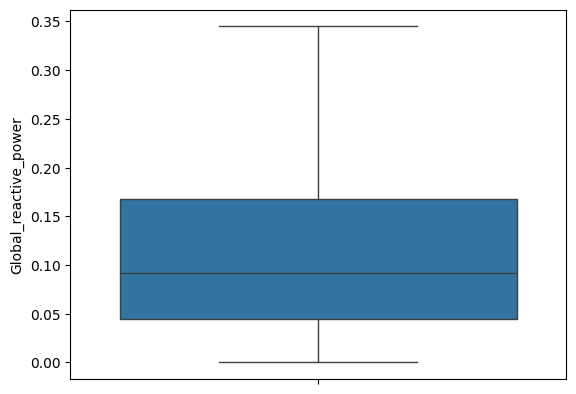

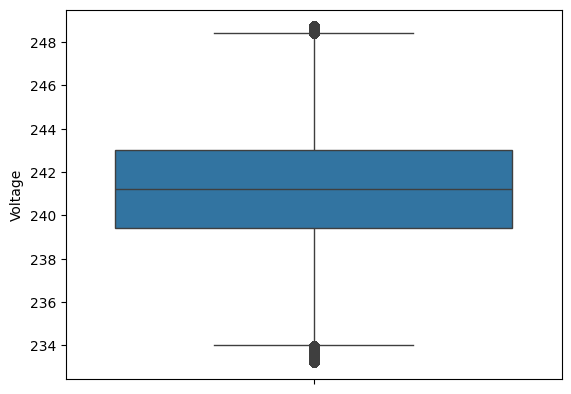

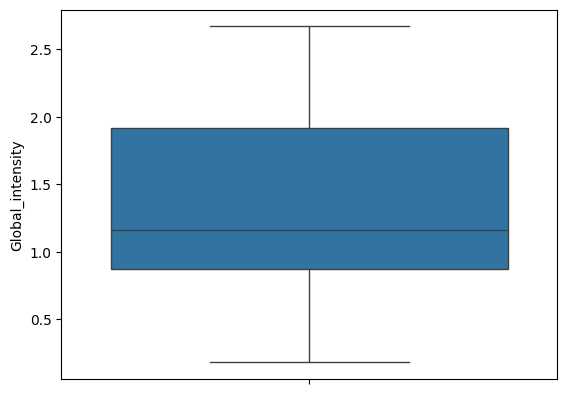

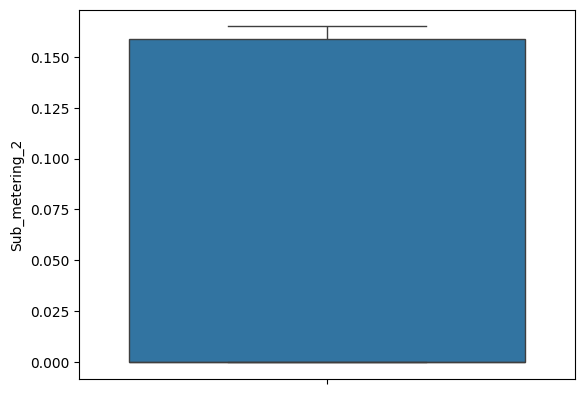

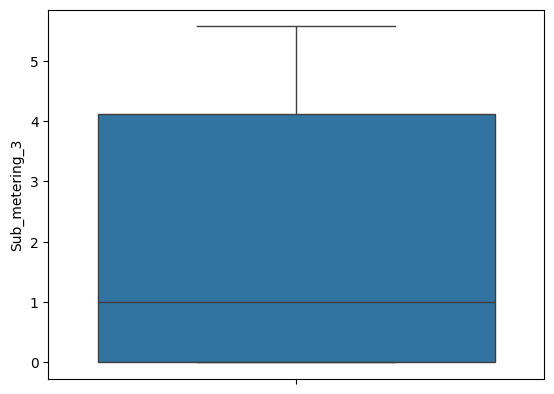

In [23]:
for i in features:
    sns.boxplot(df[i]) 
    plt.show()


In [24]:
skewness_values_after = {col: skew(df[col].dropna()) for col in features}

for col, skew_val in skewness_values_after.items():
    print(f'Updated Skewness of {col}: {skew_val:.4f}')


Updated Skewness of Global_reactive_power: 0.5588
Updated Skewness of Voltage: -0.1242
Updated Skewness of Global_intensity: 0.2975
Updated Skewness of Sub_metering_2: 1.0592
Updated Skewness of Sub_metering_3: 0.6718


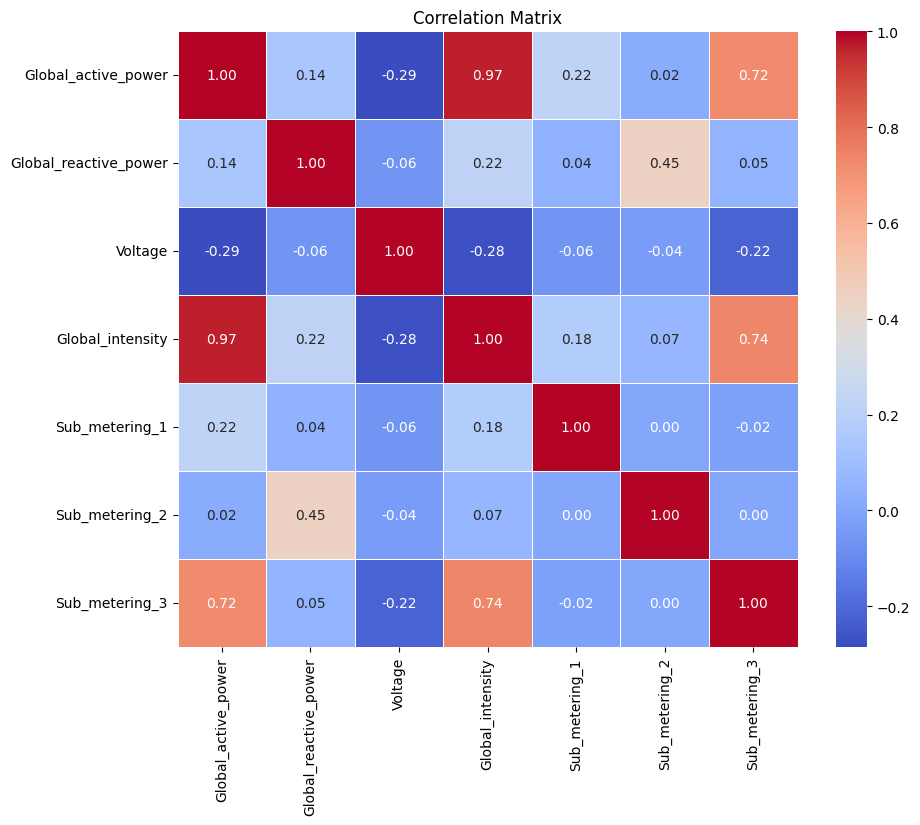

In [25]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Now that the EDA part is done, I started training models by defining the feature and target variables.

In [26]:

features = ['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_2', 'Sub_metering_3']


for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


target = 'Global_active_power'


In [27]:

X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_2', 'Sub_metering_3']]
#target variable (y)
y = df['Global_active_power'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (1453388, 5), Test Set: (363348, 5)


multiple regression models are trained and evaluated using training and testing data.  
For each model performance is measured using MAE/MSE and R2 score on both training and testing sets.  
This comparison helps determine which model is best for best this data

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train & Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Training predictions and metrics
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Testing predictions and metrics
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[name] = {
        "Train MAE": train_mae, "Test MAE": test_mae,
        "Train MSE": train_mse, "Test MSE": test_mse,
        "Train R2": train_r2,  "Test R2": test_r2
    }



results_df = pd.DataFrame(results).T
print(results_df)   

                   Train MAE  Test MAE  Train MSE  Test MSE  Train R2  \
Linear Regression   0.133351  0.133087   0.032694  0.032663  0.938933   
Decision Tree       0.003943  0.022284   0.000103  0.001906  0.999807   
Random Forest       0.008942  0.018639   0.000237  0.001149  0.999557   
Gradient Boosting   0.019440  0.019406   0.001094  0.001090  0.997957   

                    Test R2  
Linear Regression  0.939032  
Decision Tree      0.996443  
Random Forest      0.997855  
Gradient Boosting  0.997965  


In [29]:
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)
dt_model.fit(X_train, y_train)


y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# evaluation metrics
dt_results = {
    "Train MAE": mean_absolute_error(y_train, y_train_pred),
    "Test MAE": mean_absolute_error(y_test, y_test_pred),
    "Train MSE": mean_squared_error(y_train, y_train_pred),
    "Test MSE": mean_squared_error(y_test, y_test_pred),
    "Train R2": r2_score(y_train, y_train_pred),
    "Test R2": r2_score(y_test, y_test_pred)
}


dt_df = pd.DataFrame([dt_results], index=["Decision Tree"])
print(dt_df)

               Train MAE  Test MAE  Train MSE  Test MSE  Train R2   Test R2
Decision Tree   0.030716  0.030674   0.002023  0.002021  0.996221  0.996227


### Advanced Feature Engineering
creating additional temporal features and rolling statistics to improve the model's predictive ability.


In [ ]:
# Creating additional features
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').apply(lambda x: x.hour)
df['Weekday'] = df['Date'].dt.day_name()

# Creating peak hour indicator 
df['Peak_Hour'] = df['Hour'].apply(lambda x: 1 if 18 <= x <= 22 else 0)

# Creating rolling mean for Global_active_power



### Hyperparameter Tuning
I used GridSearchCV to optimize Random Forest and Gradient Boosting regressors.


In [37]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_2', 'Sub_metering_3',
        'Hour', 'Peak_Hour']]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest and Gradient Boosting
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [50], 'max_depth': [5, 10]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=1)
grid_rf.fit(X_train, y_train)


gb = GradientBoostingRegressor(random_state=42)
param_grid_gb = {'n_estimators': [100], 'learning_rate': [0.05, 0.1]}
grid_gb = GridSearchCV(gb, param_grid_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=1)
grid_gb.fit(X_train, y_train)


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.05, 0.1], 'n_estimators': [100]}"
,scoring,'neg_mean_squared_error'
,n_jobs,1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


### Model Comparison



In [38]:
trained_models = {
    'Random Forest (Tuned)': grid_rf.best_estimator_,
    'Gradient Boosting (Tuned)': grid_gb.best_estimator_,
}

results = []

for name, model in trained_models.items():

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

  
    results.append({
        'Model': name,
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred)
    })


results_df = pd.DataFrame(results)
print("Detailed Performance of Tuned trained_models:")
print(results_df)

Detailed Performance of Tuned trained_models:
                       Model  Train MAE  Test MAE  Train MSE  Test MSE  \
0      Random Forest (Tuned)   0.018078  0.018183   0.000984  0.001006   
1  Gradient Boosting (Tuned)   0.019413  0.019382   0.001082  0.001078   

   Train RMSE  Test RMSE  Train R2   Test R2  
0    0.031361   0.031719  0.998163  0.998122  
1    0.032898   0.032826  0.997978  0.997989  


Even though GridSearch identified Gradient Boosting, based on the MSE, MAE, RMSE, and R2 score, I found that Random Forest performed best among the trained models and saved it as a pickle file.

In [39]:
import joblib
joblib.dump(grid_rf.best_estimator_, 'random_forest_model.pkl')


['random_forest_model.pkl']

### Prediction vs Actual and Feature Importance


Best Random Forest Model: {'max_depth': 10, 'n_estimators': 50}


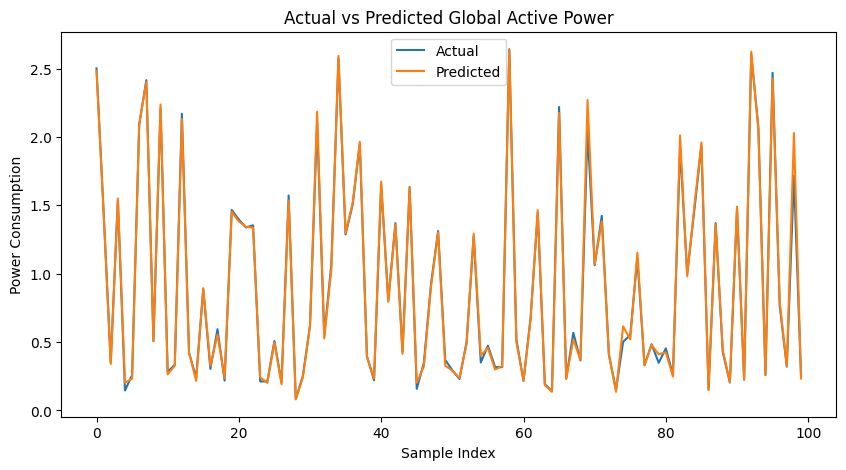

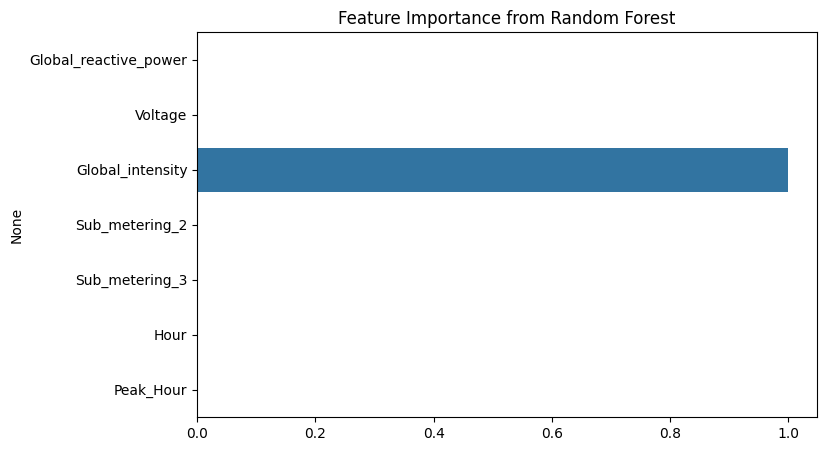

In [44]:

best_model = grid_rf.best_estimator_
print(f"Best Random Forest Model: {grid_rf.best_params_}")
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Actual vs Predicted Global Active Power')
plt.xlabel('Sample Index')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()


importances = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.show()
